# Stock Market Prediction using Numerical and Textual Analysis

# GRIP June 2021 Intern Task-7

# Akshat Runwal

In [1]:
!pip install nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns

import nltk
#VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for
# text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
stock_prices=pd.read_csv('historical_data.csv')

In [3]:
print(stock_prices.head())
print(stock_prices.size)

         Date         Open         High          Low        Close  \
0  2005-06-30  7154.270020  7218.279785  7154.270020  7193.850098   
1  2005-07-01  7165.450195  7228.569824  7154.930176  7210.770020   
2  2005-07-04  7186.740234  7284.410156  7186.740234  7277.310059   
3  2005-07-05  7275.000000  7308.720215  7209.859863  7220.250000   
4  2005-07-06  7227.220215  7296.180176  7227.220215  7287.600098   

     Adj Close   Volume  
0  7193.850098  28600.0  
1  7210.770020  12600.0  
2  7277.310059   9600.0  
3  7220.250000  12600.0  
4  7287.600098  13400.0  
25900


In [4]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3700 non-null   object 
 1   Open       3672 non-null   float64
 2   High       3672 non-null   float64
 3   Low        3672 non-null   float64
 4   Close      3672 non-null   float64
 5   Adj Close  3672 non-null   float64
 6   Volume     3672 non-null   float64
dtypes: float64(6), object(1)
memory usage: 202.5+ KB


In [5]:
stock_headlines=pd.read_csv('india-news-headlines.csv')

In [6]:
print(stock_headlines.head())
print(stock_headlines.size)

   publish_date headline_category  \
0      20010102           unknown   
1      20010102           unknown   
2      20010102           unknown   
3      20010102           unknown   
4      20010102           unknown   

                                       headline_text  
0  Status quo will not be disturbed at Ayodhya; s...  
1                Fissures in Hurriyat over Pak visit  
2              America's unwanted heading for India?  
3                 For bigwigs; it is destination Goa  
4               Extra buses to clear tourist traffic  
10272201


In [7]:
#converting stock_prices['Date'] object to datetime datatype
stock_prices['Date']=pd.to_datetime(stock_prices['Date'])
stock_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-06-30,7154.270020,7218.279785,7154.270020,7193.850098,7193.850098,28600.0
1,2005-07-01,7165.450195,7228.569824,7154.930176,7210.770020,7210.770020,12600.0
2,2005-07-04,7186.740234,7284.410156,7186.740234,7277.310059,7277.310059,9600.0
3,2005-07-05,7275.000000,7308.720215,7209.859863,7220.250000,7220.250000,12600.0
4,2005-07-06,7227.220215,7296.180176,7227.220215,7287.600098,7287.600098,13400.0
...,...,...,...,...,...,...,...
3695,2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200.0
3696,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0
3697,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0
3698,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0


In [8]:
#detecting any null value
stock_prices.isnull().values.any()

True

In [9]:
#dropping any null value if any
stock_prices.dropna(inplace=True)

In [10]:
print(stock_prices.head())

        Date         Open         High          Low        Close    Adj Close  \
0 2005-06-30  7154.270020  7218.279785  7154.270020  7193.850098  7193.850098   
1 2005-07-01  7165.450195  7228.569824  7154.930176  7210.770020  7210.770020   
2 2005-07-04  7186.740234  7284.410156  7186.740234  7277.310059  7277.310059   
3 2005-07-05  7275.000000  7308.720215  7209.859863  7220.250000  7220.250000   
4 2005-07-06  7227.220215  7296.180176  7227.220215  7287.600098  7287.600098   

    Volume  
0  28600.0  
1  12600.0  
2   9600.0  
3  12600.0  
4  13400.0  


#combine the polarity of news to data and then predict the close price
#i.e. close price is to be determined

In [11]:
stock_headlines

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [12]:
#converting stock_prices['Date'] object to datetime datatype
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date'],format= '%Y%m%d')
stock_headlines

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,removed,Govt extends deadline for use of FASTag till F...


In [13]:
#dropping any duplicate value
stock_headlines.drop_duplicates()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,removed,Govt extends deadline for use of FASTag till F...


In [14]:
#taking only publish_date column and headline_text
stock_headlines = stock_headlines.filter(['publish_date', 'headline_text'])

In [15]:
# grouping the news headlines according to Date
stock_headlines = stock_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

In [16]:
#sorting the values according to publish_date
stock_headlines=stock_headlines.sort_values(by='publish_date')

In [17]:
stock_headlines

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,"Powerless north India gropes in the dark,Think..."
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [18]:
#renaming column 'publish_date' to 'Date'
stock_headlines.columns=['Date','headline_text']

In [19]:
stock_headlines

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,"Powerless north India gropes in the dark,Think..."
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [20]:
#merging stock_prices and stock_headlines w.r.t to date
stock_data=pd.merge(stock_prices,stock_headlines, on='Date')

In [21]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text
0,2005-06-30,7154.270020,7218.279785,7154.270020,7193.850098,7193.850098,28600.0,"US kids hit fat camps in big way,Experts add m..."
1,2005-07-01,7165.450195,7228.569824,7154.930176,7210.770020,7210.770020,12600.0,"Kuch Meetha Ho Jaye,Bachke Rehna Re Baba,Silsi..."
2,2005-07-04,7186.740234,7284.410156,7186.740234,7277.310059,7277.310059,9600.0,"Boogeyman,Bush in judge test,Gladiators strike..."
3,2005-07-05,7275.000000,7308.720215,7209.859863,7220.250000,7220.250000,12600.0,"It was great fun: Pierce,A sport called hedoni..."
4,2005-07-06,7227.220215,7296.180176,7227.220215,7287.600098,7287.600098,13400.0,"Heroes of Dec 13 prove mettle again,Govt corne..."
...,...,...,...,...,...,...,...,...
3667,2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200.0,Delayed periods? Time to accept that household...
3668,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,I never thought I had a voice until today: Vid...
3669,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,Truck firms look for new export markets to sel...
3670,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,Containment zone residents slam high prices ch...


<AxesSubplot:>

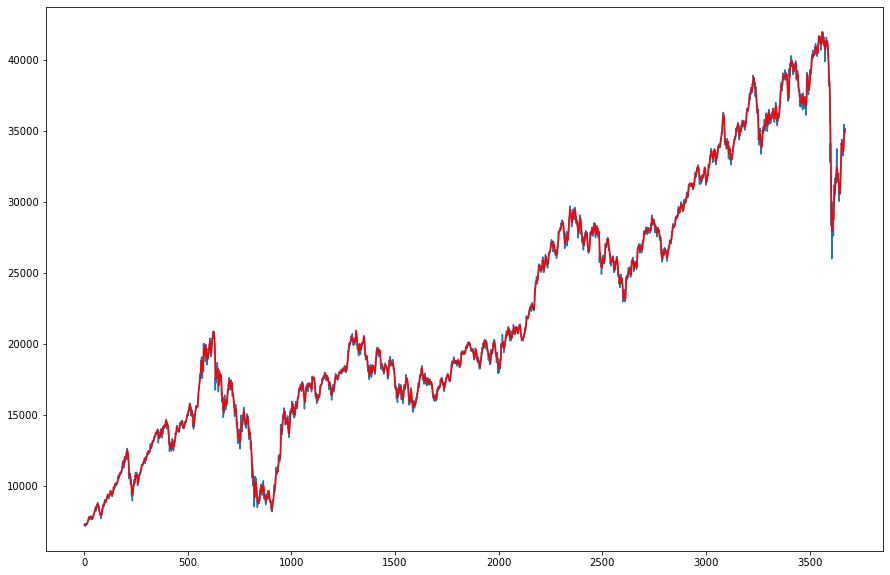

In [22]:
# Setting figure size
plt.figure(figsize=(15,10))

# Plotting the close price and  rolling mean of close price
stock_data['Close'].plot()
mean=stock_data['Close'].rolling(window=5).mean()

mean.plot(color = 'r', label = 'Rolling Mean')


In [23]:
# Doing the sentiment analysis of the headlines
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
print('Start calculating sentiment scores:')

stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
print('Compound Done')

Start calculating sentiment scores:
Compound Done


Text(0, 0.5, 'Close Price (INR)')

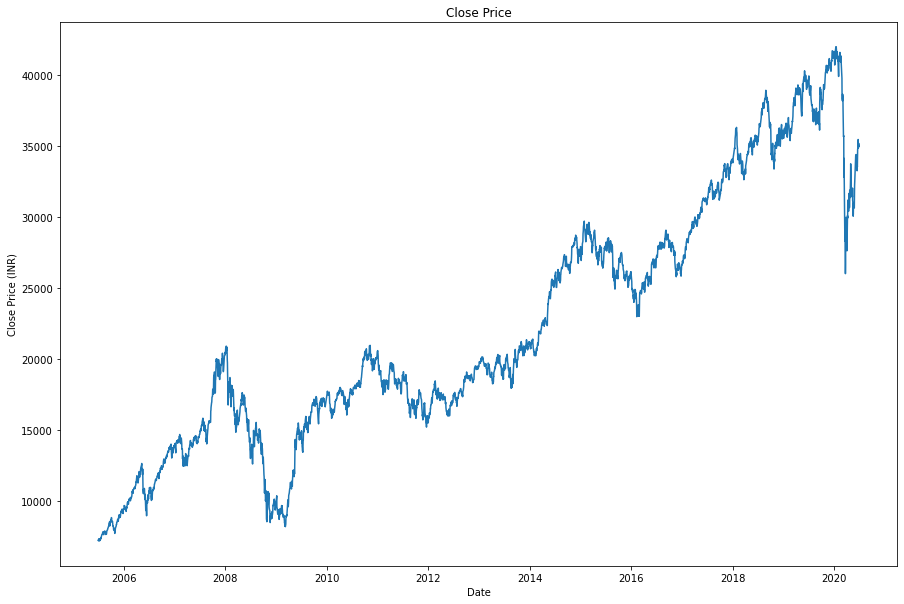

In [24]:
#Setting plot size and labels
plt.figure(figsize=(15,10))

plt.plot(stock_data['Date'],stock_data['Close'])


plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')

In [25]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,compound
0,2005-06-30,7154.270020,7218.279785,7154.270020,7193.850098,7193.850098,28600.0,"US kids hit fat camps in big way,Experts add m...",-0.8856
1,2005-07-01,7165.450195,7228.569824,7154.930176,7210.770020,7210.770020,12600.0,"Kuch Meetha Ho Jaye,Bachke Rehna Re Baba,Silsi...",0.5897
2,2005-07-04,7186.740234,7284.410156,7186.740234,7277.310059,7277.310059,9600.0,"Boogeyman,Bush in judge test,Gladiators strike...",-0.9822
3,2005-07-05,7275.000000,7308.720215,7209.859863,7220.250000,7220.250000,12600.0,"It was great fun: Pierce,A sport called hedoni...",0.9466
4,2005-07-06,7227.220215,7296.180176,7227.220215,7287.600098,7287.600098,13400.0,"Heroes of Dec 13 prove mettle again,Govt corne...",0.9606


In [26]:
# Dropping unwanted 'headline_text' and rearranging columns
stock_data.drop(['headline_text'], inplace=True, axis=1)
stock_data = stock_data[[ 'Open', 'High', 'Low', 'Volume', 'compound', 'Close']]

# final stock_data
stock_data.head()

,Open,High,Low,Volume,compound,Close
0,7154.270020,7218.279785,7154.270020,28600.0,-0.8856,7193.850098
1,7165.450195,7228.569824,7154.930176,12600.0,0.5897,7210.770020
2,7186.740234,7284.410156,7186.740234,9600.0,-0.9822,7277.310059
3,7275.000000,7308.720215,7209.859863,12600.0,0.9466,7220.250000
4,7227.220215,7296.180176,7227.220215,13400.0,0.9606,7287.600098


In [27]:
X=stock_data.iloc[:,:-1].values
Y=stock_data.iloc[:,-1].values

In [28]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [29]:
# Data modelling
!pip install xgboost
import xgboost 
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
# Getting the prediction
predictions = xgb.predict(X_test)
X_test

array([[ 1.81351191e+04,  1.81351191e+04,  1.75596992e+04,
         2.30000000e+04, -9.99700000e-01],
       [ 9.39862012e+03,  9.41370019e+03,  9.32875977e+03,
         3.62000000e+04, -9.97900000e-01],
       [ 3.20303398e+04,  3.23015801e+04,  3.15008691e+04,
         1.81000000e+04, -9.99300000e-01],
       ...,
       [ 1.54285000e+04,  1.54634600e+04,  1.52405303e+04,
         4.08000000e+04, -9.99700000e-01],
       [ 1.99997695e+04,  2.00555293e+04,  1.97776309e+04,
         1.57000000e+04, -9.99600000e-01],
       [ 1.96798809e+04,  1.97546602e+04,  1.96027109e+04,
         7.40000000e+03, -9.98900000e-01]])

Text(0, 0.5, 'Stock Price')

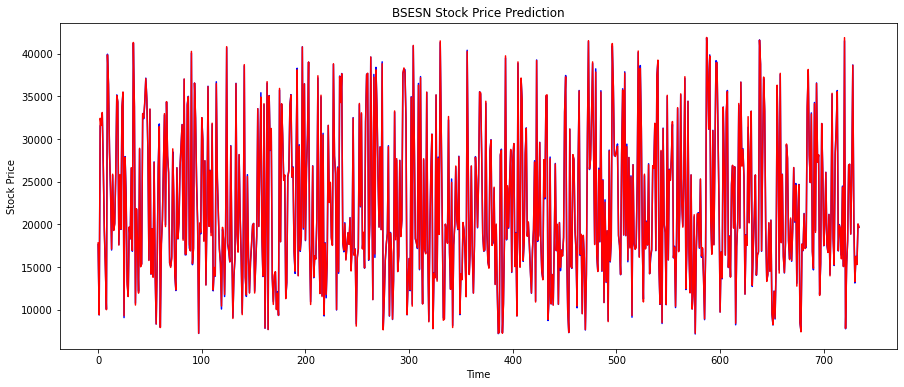

In [31]:
# Plotting prediction w.r.t Y_test
plt.figure(figsize=(15,6))
plt.plot(Y_test, label='Test', color='b')
plt.plot(predictions, label='Prediction', color='r')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')

In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predictions, Y_test)
mse

21226.629783346583

In [33]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(predictions,Y_test))

0.999723812269818


In [37]:
import pickle
pickle.dump(xgb,open("xgb_regressor1.pkl","wb"))